# 1 Support Vector Machines

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn import svm

## 1.1 Example Dataset 1

In [2]:
data = loadmat('../data/ex6data1')
X = data['X']
y = np.squeeze(data['y'])

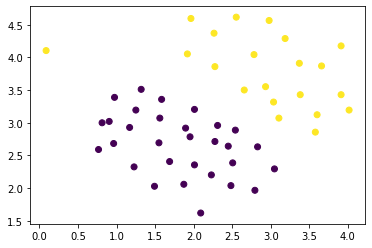

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)

In [4]:
def plot_decision_boundary(clf, X, y, res = 1000, extraB = 0.5):
    """plots the decition boundary of the classifier clf. plots the data set as well. 
    res: resulition of boundary
    extraB: by how much to extanded the range of the boundary"""
    
    x_range = np.linspace(X[:,0].min() - extraB, X[:,0].max() + extraB, res)
    y_range = np.linspace(X[:,1].min() - extraB, X[:,1].max() + extraB, res)

    xx, yy = np.meshgrid(x_range, y_range)

    X_plot = np.stack([xx.ravel(), yy.ravel()], axis=1)
#     print(X_plot.shape)
    Z = clf.predict(X_plot).reshape(xx.shape)

    plt.contour(xx,yy,Z,levels=[0.5], colors='blue')
    plt.scatter(X[:,0], X[:,1], c=y)

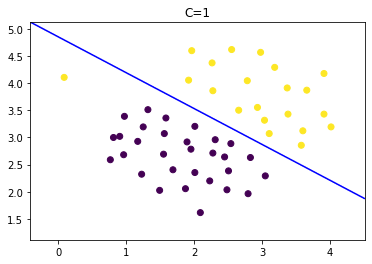

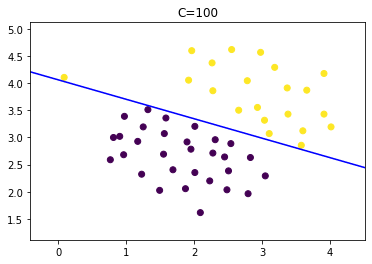

In [5]:
for C in [1, 100]:
    clf = svm.SVC(C=C, kernel='linear')
    clf.fit(X, y)
    plot_decision_boundary(clf, X, y)
    plt.title('C='+str(C))
    plt.show()

## 1.2 SVM with Gaussian Kernels

### 1.2.1 Gaussian Kernel

In [6]:
def gaussianKernel(x,y):
    """note: this is a very slow implematation. so i don't use it"""
    sigma = 1
    print('x: ' + str(x.shape))
    print('y: ' + str(y.shape))
    n_samples_x = x.shape[0]
    n_samples_y = y.shape[0]
    
    if n_samples_x == n_samples_y:
        return np.exp(-(x-y).dot((x-y).T)/(2*sigma**2))
    
    kernal = np.zeros([n_samples_x, n_samples_y])
    for i in range(n_samples_x):
        for j in range(n_samples_y):
            kernal[i,j] = np.exp(-(x[i]-y[j]).dot((x[i]-y[j]).T)/(2*sigma**2))
    return kernal

### 1.2.2 Example Dataset 2

In [7]:
data = loadmat('../data/ex6data2')
X = data['X']
y = np.squeeze(data['y'])

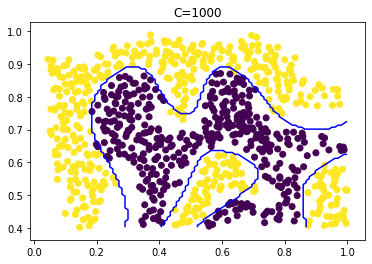

In [8]:
C = 1000
gamma = 'scale'
# clf = svm.SVC(C=C, kernel=gaussianKernel)
clf = svm.SVC(C=C, kernel='rbf', gamma = gamma)
clf.fit(X, y)
plot_decision_boundary(clf, X, y, extraB=0, res=100)
plt.title('C='+str(C))
plt.show()

### 1.2.3 Example Dataset 3

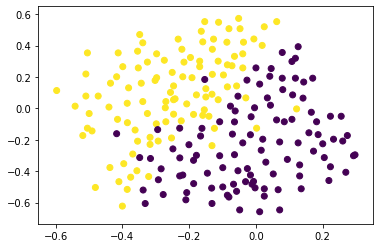

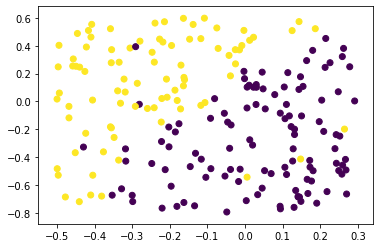

In [9]:
data = loadmat('../data/ex6data3')
X = data['X']
y = np.squeeze(data['y'])*1.0
Xval = data['Xval']
yval = np.squeeze(data['yval'])*1.0

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()
plt.scatter(Xval[:,0], Xval[:,1], c=yval)

In [10]:
C_vec = np.geomspace(0.001, 100, 50)
gamma_vec = np.geomspace(0.001, 100, 50)

accuracy = np.zeros([len(C_vec), len(gamma_vec)])
for i, C in enumerate(C_vec):
    for j, gamma in enumerate(gamma_vec):
        clf = svm.SVC(C=C, kernel='rbf', gamma = gamma)
        clf.fit(X, y)
        pred_val = clf.predict(Xval)
        accuracy[i,j] = 1 -  np.abs(pred_val-yval).sum()/len(yval)

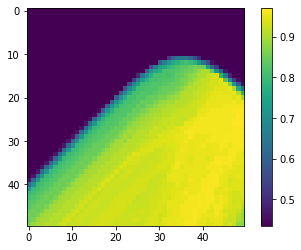

In [11]:
plt.imshow(accuracy)
plt.colorbar()
plt.show()

accuracy: 0.970


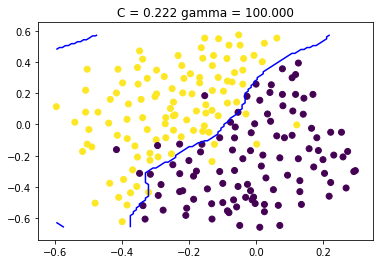

In [14]:
best_idx = accuracy.argmax()
best_C_idx, best_gamma_idx = np.unravel_index(best_idx, accuracy.shape)
best_C = C_vec[best_C_idx]
best_gamma = gamma_vec[best_gamma_idx]

print('accuracy: %.3f' % accuracy.max())
# best_clf =  svm.SVC(C=best_C, kernel='rbf', gamma = best_gamma)
best_clf =  svm.SVC(C=best_C, kernel='rbf', gamma = best_gamma)
best_clf.fit(X, y)
plot_decision_boundary(best_clf, X, y, extraB=0, res=100)
plt.title('C = %.3f gamma = %.3f' % (best_C, best_gamma))
plt.show()